
## Model Evaluation

### 1.  Cross-Validating Models

Cross-validation is an important technique often used in machine learning to assess  both the variability of a dataset and the reliability of any model trained using that data. The Cross-Validate Model module takes as input a labeled dataset, together with an untrained classification or regression model.

#### Problem
You want to evaluate how well your model will work in the real world

#### Solution
Create a pipeline that preprocesses the data, trains the model, and then evaluates it using cross-validation:

In [1]:
# load libraries
from sklearn import datasets, metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# load digits dataset
digits = datasets.load_digits()

# create features matrix
features = digits.data

# create target vector
target = digits.target

# create standardizer
standardizer = StandardScaler()
"""Standardization is an important technique that is mostly performed as a 
   pre-processing step before many Machine Learning models, to standardize the range of features of input data set."""

# create logitic regression object
logit = LogisticRegression()

"""the logistic regression is a predictive analysis. Logistic regression is used 
to describe data and to explain the relationship between one dependent binary variable and one 
or more nominal, ordinal, interval or ratio-level independent variables."""


# create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit) 

"""A machine learning pipeline is used to help automate machine learning workflows. 
They operate by enabling a sequence of data to be transformed and correlated together 
in a model that can be tested and evaluated to achieve an outcome, whether positive or negative."""


# create k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1) 

"""Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. 
The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be
split into"""


# conduct k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             features, # feature matrix
                             target, # target vector
                             cv=kf, # cross-validation technique,
                             scoring="accuracy", # loss function
                             n_jobs=-1) # use all CPU cores

# calculate mean
cv_results.mean()

0.9693916821849783

### 2. Creating a Baseline Regression Model

#### What is baseline regression model?
Fundamentally, a baseline is a model that is both simple to set up and has a reasonable chance of providing decent results. Experimenting with them is usually quick and low cost, since implementations are widely available in popular packages. Here are a few baselines that can be useful to consider: Linear Regression. 

#### What is baseline model?
A baseline is the result of a very basic model/solution. You generally create a baseline and then try to make more complex solutions in order to get a better result. If you achieve a better score than the baseline, it is good.

#### Problem
You want a simple baseline regression model to compare against your model
#### Solution
Use scikit-learn's DummyRegressor to create a simple model to use as a baseline:

In [3]:
# load libraries
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# load data
boston = load_boston()

# create features
features, target = boston.data, boston.target

# make test and training split
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

# create a dummy regressor
dummy = DummyRegressor(strategy='mean')

"""DummyRegressor is a regressor that makes predictions using simple rules. 
This regressor is useful as a simple baseline to compare with other (real) regressors.
Do not use it for real problems."""

# "Train" dummy regressor
dummy.fit(features_train, target_train)

"""Model fitting is a measure of how well a machine learning model generalizes to similar data to that on 
which it was trained. A model that is well-fitted produces more accurate outcomes. 
A model that is overfitted matches the data too closely. A model that is underfitted doesn't match closely enough."""

# Get R-squared score
dummy.score(features_test, target_test)



"""R-squared (R2) is a statistical measure that represents 
the proportion of the variance for a dependent variable that's explained 
by an independent variable or variables in a regression model."""

-0.001119359203955339

To compare, we train our model and evaluate the performance score:

In [4]:
# load library
from sklearn.linear_model import LinearRegression

# train simple linear regression model
ols = LinearRegression()
ols.fit(features_train, target_train)

# get R-squared score
ols.score(features_test, target_test)

0.6354638433202114

#### Discussion
DummyRegressor allows us to create a very simple model that we can use as abaseline to compare against our actual model. This can often be useful to simulate a "naive" existing prediction process in a product or system. For example, a product might have been originally hardcoded to assume that all new users will spend $100 in the first month, regardless of their features. If we encode that assumption into a baseline model, we are able to concretely state the benefits of using a machine learning approach.

DummyRegressor uses the strategy parameter to set the method of making predictions, including the mean or median value in the training set. Furthermore, if we set strategy to constant and use the constant parameter, we can set the dummy regressor to predict some constant value for every observation:

In [5]:
# create dummy regressor that predicts 20's for everything
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)

# evaluate score
clf.score(features_test, target_test)

-0.06510502029325727

One small note regarding score. By default, score returns the coefficient of determination (R-squared, $R^2$) score:

$$R^2 = 1 - \frac{\sum(y_i - \hat y_i)^2}{\sum(y_i - \bar y)^2}$$

where $y_i$ is the true value of the target observation, $\hat y_i$ is the predicted value, and $\bar y$ is the mean value for the target vector

The closer $R^2$ is to 1, the more of the variance in the target vector that is explained by the features.

### 3. Creating a Baseline Classification Model

#### Problem
You want a simple baseline classifier to compare against your model

#### Solution
Use scikit-learn's DummyClassifer

In [5]:
# load libraries
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# load data
iris = load_iris()

# create target vector and feature matrix
features, target = iris.data, iris.target

# split into training and test set
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

# create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

# "train" model
dummy.fit(features_train, target_train)

# get accuracy score
dummy.score(features_test, target_test)

0.42105263157894735

### 4.  Evaluating Binary Classifier Predictions
#### Problem
Given a trained classification model, you want to evaluate it's quality

#### Solution
Use scikit-learn's cross_val_score to conduct cross-validation while using the `scoring` parameter to define one of a number of performance metrics, including accuracy, precision, recall, and $F_1$

Accuracy is a common performance metric. It is simply the proportion of observations predicted corrected

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

where:
* $TP$ is the number of true positives. Observations that are part of the positive class (has the disease, pruchased the product, etc) and that we predicted correctly.

* $TN$ is the number of true negatives. Observations that are part of the negative class (does not have the disease, did not purchase hte product, etc.) and that we predicted correctly.

* $FP$ is the number of false positives. Also called Type 1 error. Observations predicted to be part of hte positive class that are actually part of the negative class.

* $FN$ is the number of false negatives. Also called Type 2 error. Observations predicted to be part of the negative class that are actually part of the positive class.

We can measure accuracy in three-fold (the default number of folds) cross-validation by setting `scoring='accuracy'`

In [7]:
# load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# generate features matrix and target vector
X, y = make_classification(n_samples = 10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 2,
                           random_state = 1)

# create logistic regression
logit = LogisticRegression()

# cross-validate model using accuracy
cross_val_score(logit, X, y, scoring='accuracy')

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

Precision is the proportion of every observation predicted to be positive that is actually positive. We can think about it as a measurement of noise in our predictions-- that is, when we predict something is positive, how likely we are to be right. Models with high precision are pessimistic in that they only predict an observation is of the positive class when they are very certain about it. Formally, precision is:

$$Precision = \frac{TP}{TP + FP}$$

In [4]:
# cross-validate model using precision
cross_val_score(logit, X, y, scoring='precision')

array([0.95252404, 0.96583282, 0.95558223])

Recall is the proportion of every positive observation that is truly positive. Recall measures the model's ability to identify an observation of the positive class. Models with high recall are optimistic in that they have a low bar for predicting that an observation is in the positive class:

$$ Recall = \frac{TP}{TP + FN}$$

In [5]:
# cross-validate model using recall
cross_val_score(logit, X, y, scoring='recall')

array([0.95080984, 0.94961008, 0.95558223])

Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. ... In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on

The $F_1$ score is the harmonic mean (a kind of average used for ratios):
$$ F_1 = 2 * \frac{Precision * Recall}{Precision + Recall}$$

### 5. Evaluating Binary Classifier Thresholds
#### Problem
You want to evaluate a binary classifier and various probability thresholds

#### Solution
The Recieving Operating Characteristic (ROC) curve is a common method for evaluating the the quality of a binary classifier. ROC compares the presence of true positives and false positives at every probability threshold (i.e. the probability at which an observation is predicted to be a class). By plotting the ROC curve, we can see how the model performs. A classifier that predicts every observation correctly woudl look like the solid light gray line in the following chart, going straight up to the top immediately. A classifier that predicts at random will appear as the diagonal line. The better the model, the closer it is to the solid line. In scikit-learn, we can use `roc_curve` to calculate the true and false positives at each threshold, then plot them:

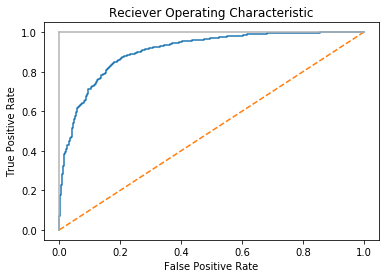

In [10]:
# load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# create feature matrix and target vector
features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

# split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=1)

# create classifier
logit = LogisticRegression()

# train model
logit.fit(features_train, target_train)

# get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

# plot ROC curve
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

#### Discussion
Up until now we have only examined models based on the values they predict. However, in amny leanring algorithms those predicted values are based off of probaility estimates. That is, each observation is given an explicit probability of belonging in each class. In our solution, we can use `predict_proba` to see the predicted probabilities for the first observation:

In [11]:
# get predicted probabilities
logit.predict_proba(features_test)[0:1]

array([[0.87094106, 0.12905894]])

We can see the classes using `classes_`:

In [12]:
logit.classes_

array([0, 1])

In this example, the first observation has an ~87% chance of being in the negative class (0) and a 13% chance of being in the positive class (1). By default, scikit-learn predicts an observation is part of the positive class if the probabaility is greater than 0.5 (called the *threshold*). However, instead of a middle ground, we will often want to explicitly bias our model to use a different threshold for substantive reasons. For example, if a false positive is very costly to our company, we might prefer a model that has a high probability threshold. We fail to predict some positives, but when an observation is predicted to be postivie, we can be very confident that the prediction is correct. This trade-off isrepresnted in the true positive rate (TPR) and the false positive rate (FPR).

The true positive rate is the number of observations correctly predicted true divided by all true positive observations:
$$TPR = \frac{True Positives}{True Positives+False Negatives}$$

The false positive rate is the number of incorrectly predicted positives divided by all true negative observations:
$$FPR = \frac{False Positives}{False Positives+True Negatives}$$

The ROC curve represnets the rspective TPR and FPR for every probability threshold. For example, in our solution a threshold of roughly 0.76 has a TPR of 0.63 and an FPR of 0.68 

(note from dustin: idk how to set the threshold and don't know where the indexes 116 and 45 came from in the book)

In [13]:
print("Threshold: {}".format(threshold[116]))
print("True Positive Rate: {}".format(true_positive_rate[116]))
print("False Positive Rate: {}".format(false_positive_rate[116]))

Threshold: 0.7624885951495372
True Positive Rate: 0.629889669007021
False Positive Rate: 0.06679960119641076


However if we increase the threshold to ~89% (i.e. increase how certain the model has to be before it predicts an observation as positive) the TPR drops significantly but so does the FPR:

In [14]:
print("Threshold: {}".format(threshold[45]))
print("True Positive Rate: {}".format(true_positive_rate[45]))
print("False Positive Rate: {}".format(false_positive_rate[45]))

Threshold: 0.8921412599174249
True Positive Rate: 0.4112337011033099
False Positive Rate: 0.023928215353938187


This is because of our higher requirement for beign predicted to be in the positive class has made the model not identify a number of positive obesrvations (the lower TPR), but also reduce the noise from negative observations being predicted as positive (the lower FPR).

In addition to being able to visualize the trade-off between TPR and FPR, the ROC curve can also be used as a general metric for a model. The better a model is, the higher the curve and thus the greater the area under the curve. For this reason, it is common to calculate the area under the ROC curve (AUCROC) to judge the overall quality of a model at al possible thresholds. The closer the AUCROC is to 1, the better the model. In scikit-learn we can calculate the AUCROC using `roc_auc_score`:

In [16]:
# calculate area under curve
roc_auc_score(target_test, target_probabilities)

0.9060171541543875

### 6. Evaluating Multiclass Classifier Predictions

#### Problem
You have a model that predicts three or more classes and want to evaluate its performance.

#### Solution
Use cross-validation with an evaluation metric capable of handling more than two classes:

In [17]:
# load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# generate features matrix and target vector
features, target = make_classification(n_samples=10000,
                                       n_features=3,
                                       n_informative=3,
                                       n_redundant=0,
                                       n_classes=3,
                                       random_state=1)

# create logistic regression
logit = LogisticRegression()

# cross-validate model using accuracy
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

#### Discussion
When we have balanced classes (e.g. a roughly equal number of observations in each class of a target vector), accuracy is--just like in the binary class setting--a simple and interpretable chocie for an evaluation metric. Accuracy is the number of correct predictions divided by the number of observations and works just as well in the multiclass as binary setting. However, when we have imbalanced classes (a common scenario), we should be inclined to use other evaluation metrics.

Many of scikit-learn's built-in metrics are for evaluating binary classifiers. However, many of these metrics can be extended for use when we have more than two classes. Precision, recall, and F1 scores are useful metrics that we have already covered in detial in previous recipes. While all of them were originally designed for binary classifiers, we can apply them to multiclass settings by treating our data as a set of binary classes. Doing so enables us to apply the metrics to each class as if it were the only class in the data, and then aggregate the evaluation scores for all the classes by averaging them:

In [18]:
# cross-validate model using macro averaged F1 score
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

In this code, `_macro` refers to the method uses to average the evaluation scores from the classes:
`macro`
* Calculate mean of metric scores for each class, weighting each class equally
`weighted`
* Calculate mean of metric scores for each class, weighting each class proportional to its size in the data
`micro`
* Calculate mean of metric scores for each observation-class combination.

### Macro-average Method
The Macro-average F-Score will be simply the harmonic mean of these two figures. Macro-average method can be used when you want to know how the system performs overall across the sets of data. ... On the other hand, micro-average can be a useful measure when your dataset varies in size.

### 7 Visualizing a Classifier's Performance
#### Problem
Given predicted classes and true classes of the test data, you want to visually compare the model's quality

#### Solution
Use a confusion matrix, which compares predicted classes and true classes:

C:\Users\bsram\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


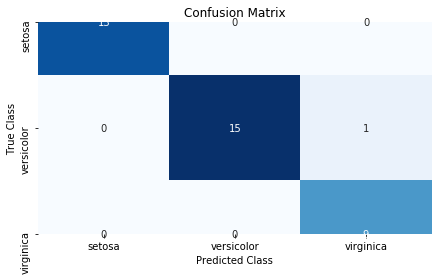

In [19]:
# load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# load data
iris = datasets.load_iris()

# create feature matrix
features = iris.data

# create target vector
target = iris.target

# create list of target class names
class_names = iris.target_names

# split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

# create logistic regression
classifier = LogisticRegression()

# train model and make predictions
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

# create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()



### 8.  Evaluating Regression Models
#### Problem
You want to evaluate the performance of a regression model.

#### Solution
Use mean squared error (MSE):

The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences

In [5]:
# load libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# generate features matrix, target vector
features, target = make_regression(n_samples = 100,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 50,
                                   coef = False,
                                   random_state = 1)

# create a linear regression object
ols = LinearRegression()

# cross-validate the lienar regression using (negative) MSE
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1718.22817783, -3103.4124284 , -1377.17858823])

Another common regression metric is the coefficient of determination, $R^2$

In [6]:
cross_val_score(ols, features, target, scoring='r2')

array([0.87804558, 0.76395862, 0.89154377])

#### Discussion
MSE is one of the most common evaluation metrics for regression models. Formally, MSE is:

$$
MSE = \frac{1}{n} * \sum_{i=0}^n{(\hat y_i - y_i)^2}
$$

where $n$ is the number of observations
$y_i$ is the true value of the target we are trying to predict for observation $i$
$\hat y_i$ is the model's predicted value

MSE is a measurement of the squared sum of all distances between predicted and true values.

The higher the value of MSE, the greater the total squared error and thus the worse the model. Ther are a number of mathematical benefits to squaring the error term, including that it forced all error alues to be positive, but one often unrealized implication is that squaring penalizes a few large errors mroe than many small errors, even if the absolute value of the errors is the same. 

For example, imagine wo models, A and B, each with two observations:
* Model A has errors of 0 and 10 and thus its MSE is $0^2 + 10^2 = 100$.
* Model B has two errors of 5 each, and thus its MSE is $5^2 + 5^2 = 50$

Both models have the same total error, 10; however, MSE would consider Model A (MSE = 100) worse than Model B (MSE=50). In practice this implicatino is rarely an issue (and indeed can be theoretically beneficial) and MSE works perfectly fine as an evaluation metric

One important note: by default in scikit-learn arguments of the `scoring` parameter assume that higher values are better than lower values. However, this is not the case for MSE, where higher values mean a worse model. For this reason, scikit-learn looks at the negative MSE using the `neg_mean_squared_error` argument

A common alternative regression evaluation metric is $R^2$, which measures the amount of variance in the target vector that is explained by the model:
$$
R^2 = 1 - \frac{\sum_{i=1}^n{(y_i - \hat y_i)^2}}{\sum_{i=1}^n{(y_i - \bar y)^2}}
$$

where $y_i$ is the true target value of the ith observation

$\hat y_i$ is the predicted value for the ith observation

and $\bar y$ is the mean value of the target vector. 

The closer to 1.0, the better the model.


### 9 Evaluating Clustering Models
#### Problem
You have used an unsupervised learning algorithm to cluster your data. Now you want to know how well it did.

#### Solution
The short answer is that you probably can't, at least not the way you want.

That said, one option is to evaluate clustering using silhouette coefficients, which measure the quality of the clusters:

In [8]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# generate feature matrix
features, _ = make_blobs(n_samples = 1000,
                         n_features = 10,
                         centers = 2,
                         cluster_std = 0.5,
                         shuffle = True,
                         random_state = 1)

# cluster data using k-means to predict classes
model = KMeans(n_clusters=2, random_state=1).fit(features)

# get predicted classes
target_predicted = model.labels_

# evaluate model
silhouette_score(features, target_predicted)

0.8916265564072142

#### Discussion
Supervised model evaluation compares predictsion (e.g. classes or quantitative values) wit hteh corresponding true values in the target vector. However, the most common motivation for using clustering methods is that you data doesn't have a target vector. There are a number of clustering evaluation metrics that require a target vector, but again, using unsupervised learning approaches like clustering when you ahve a target vector available to you is probably handicapping yourself unnecessarily.

While we cannot evaluate predictions versus true values if we don't have a target vector, we can evaluate the nature of the clusters themselves. Intuitively, we can imagine "good" clusters having very small distances between the different clusters (i.e., well separated clusters). Silhouette coefficients provide a single value measuring both traits. Formally, the ith observation's silhouette coefficient is:

$$
s_i = \frac{b_i - a}{max(a_i, b_i)}
$$

where $s_i$ is the silhouette coefficient for observation i
$a_i$ is the mean distance between i and all observations of the same class
$b_i$ is the mean distance between i and all observations of a different class

Silhouette coefficients range between -1 and 1, with 1 indicating dense, well-separated clusters.


### 10. Creating a Custom Evaluation Metric
#### Problem
#### Solution

#### Discussion

### 11. Visualizing the Effect of Training Set Size
#### Problem
You want to evaluate the effect of the number of observations in your training set on some metric (accuracy, F1, etc)

#### Solution

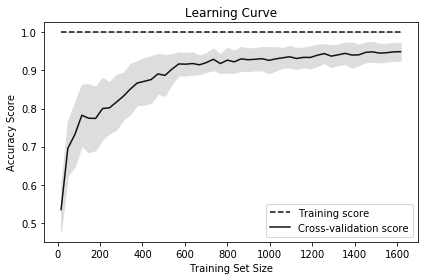

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

# load data
digits = load_digits()

# create feature matrix and target vector
features, target = digits.data, digits.target

# reate CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        features, 
                                                        target, 
                                                        cv=10, 
                                                        scoring='accuracy', 
                                                        n_jobs=-1, 
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# create means nad standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### Discussion
Learning curves visualize the performance (e.g. accuracy, recall) of a model on the training set and during cross-validation as the number of observatino in the training set increases. They are commonly used to detemrine if our learning algorithms would benefit from gathering addition training data.

In our solution, we plot the accuracy of a random forest classifier at 50 different training set sizes ranging from 1% of observation to 100%. THe increasing accuracy score of the cross-validated models tell us that we would likely benefit from additional observations (although in practice this might not be feasible).


### 12.  Creating a Text Report of Evaluation Metrics
#### Problem
You want a quick description of a classifier's performance.

#### Solution
Use scikit-learn's `classification_report`:

In [21]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# load data
iris = datasets.load_iris()

# create feature matrix
features = iris.data

# create target vector
target = iris.target

# create list of target class names
class_names = iris.target_names

# create training and test set
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

# create logistic regression
classifier = LogisticRegression()

# train model and make predictions
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

# create classification report
print(classification_report(target_test, target_predicted, target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



C:\Users\bsram\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Discussion
`classification_report` provides a quick means for us to see some common evaluation metrics, including precision, recall, and F1-score (described earlier in this chapter). Support refrs to the number of observations in each class

### weighted avg
Model averaging is an approach to ensemble learning where each ensemble member contributes an equal amount to the final prediction. In the case of regression, the ensemble prediction is calculated as the average of the member predictions.


### 13. Visualizing the Effect of Hyperparameter Values
#### Problem
You want to understand how the performance of a model changes as the value of some hyperparameter changes

#### Solution
Plot the validation curve:

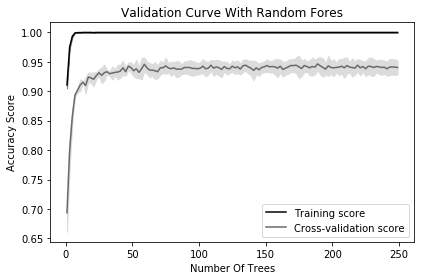

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# load data
digits = load_digits()

# create feature matrix and target vector
features, target = digits.data, digits.target

# create range of values for parameter
param_range = np.arange(1, 250, 2)

# calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
    RandomForestClassifier(),
    features,
    target,
    param_name="n_estimators",
    param_range=param_range,
    cv=3,
    scoring="accuracy",
    n_jobs=-1)

# calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot mean accuracy score for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# plt accuracy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean+train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean+test_std, color="gainsboro")

# create plot
plt.title("Validation Curve With Random Fores")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

#### Discussion
Most training algorithms contain hyperparameters that must be chosen before the training process begins.

For example, a random forest classifier creates a "forest" of decision trees, each of  which vote so n the predicted classo f an observaiton. One hyperparameter in random forest classifiers is the number of tress in the forest. Most often hyperparameter values are selcted during model selection. However, it is occasionally useful to visualize how model performance changes as the hyperparameters changes. In our solution, we plot the changes in accuracy for a random forest classifier for the training set and during cross-validation as the number of trees increases. When we have a small number of trees, both the training and cross-validation score are low, suggesting the model is underfitted. As the number of trees increases to 250, the accuracy of both levels off, suggesting there is probably not much value in the computation cost of traingin a massive forest.

In sci-kit-learn, we can calculate the validation curve using `validation_curve`, which contains three important parameters:
* `param_name` is the name of the hyperparameter to vary
* `param_range` is the value of the hyperparmeter to use
* `scoring` is the evaluation metric used to judge the model.

